In [35]:
import matplotlib.pyplot as plt

import tensorflow as tf
from glob import glob
import pandas as pd
import os 
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import sequence
import cv2 as cv
import numpy as np
import pickle

In [2]:
filesImages=os.listdir('./validation_data/flickr8k_validation_set_500_images')
path_models=os.listdir('./models')

In [5]:
print(filesImages)
print(path_models)

['captions.csv', 'Images']
['caption_model_v1.1.1_keras.keras', 'caption_model_v1_1_1.h5', 'InceptionEF_model (1).h5', 'vocab.pickle']


In [6]:
df=pd.read_csv(f"./validation_data/flickr8k_validation_set_500_images/{filesImages[filesImages.index('captions.csv')]}")

In [7]:
captions_image=df.groupby('image')['caption'].apply(list).to_dict()

In [8]:
captions_image

{'1007129816_e794419615.jpg': ['A man wears an orange hat and glasses .',
  'A man with glasses is wearing a beer can crocheted hat .',
  'A man with gauges and glasses is wearing a Blitz hat .',
  'The man with pierced ears is wearing glasses and an orange hat .',
  'A man in an orange hat starring at something .'],
 '1022454428_b6b660a67b.jpg': ['A couple with their newborn baby sitting under a tree facing a lake .',
  'Couple with a baby sit outdoors next to their stroller .',
  'A couple and an infant , being held by the male , sitting next to a pond with a near by stroller .',
  'A man and woman care for an infant along the side of a body of water .',
  'A couple sit on the grass with a baby and stroller .'],
 '103195344_5d2dc613a3.jpg': ['The man with the backpack is sitting in a buildings courtyard in front of an art sculpture reading .',
  'A man sitting in front of a metal sculpture in front of a building .',
  'A man sits and reads a newspaper by a sculpture outside of an off

In [9]:
images_test=glob('./validation_data/flickr8k_validation_set_500_images/Images/*.jpg')

In [10]:
list_of_images_path = list(captions_image.keys())

In [30]:
list_of_images_path

['322791392_aa3b142f43.jpg',
 '2478929971_9eb6c074b6.jpg',
 '2527713011_b0ec25aa54.jpg',
 '3122579598_14841c038a.jpg',
 '2892395757_0a1b0eedd2.jpg',
 '143688283_a96ded20f1.jpg',
 '336460583_6c8ccb7188.jpg',
 '3268191118_ba25fabab6.jpg',
 '3461677493_5bfb73038e.jpg',
 '3502993968_4ee36afb0e.jpg',
 '3356748019_2251399314.jpg',
 '391579205_c8373b5411.jpg',
 '2772532341_c4597a94ed.jpg',
 '488549693_a1f51d8c4a.jpg',
 '3537400880_8f410d747d.jpg',
 '3476381830_3751dd9339.jpg',
 '530661899_94655d7d0e.jpg',
 '3493844822_c315a11275.jpg',
 '3431101934_99a6c55914.jpg',
 '1022454428_b6b660a67b.jpg',
 '3737711435_113ccd0a52.jpg',
 '3694064560_467683205b.jpg',
 '2180480870_dcaf5ac0df.jpg',
 '3201594926_cd2009eb13.jpg',
 '3175446111_681a89f873.jpg',
 '1454841725_4b6e6199e2.jpg',
 '2411824767_4eb1fae823.jpg',
 '3458215674_2aa5e64643.jpg',
 '2339573065_91f1e3be60.jpg',
 '2661138991_d55aa0e5dc.jpg',
 '152029243_b3582c36fa.jpg',
 '640053014_549d2f23d2.jpg',
 '2526585002_10987a63f3.jpg',
 '3429641260_2f035

In [11]:
def proprocessing(imge):
    img_read=plt.imread(imge)
    img=cv.resize(img_read,(299,299))
    img=preprocess_input(img)
    return np.array(img)

In [12]:
with open('./models/vocab.pickle','rb') as f:
    tokenizer=pickle.load(f)

In [13]:
def beam_search(model_cnn,model_rnn,image,beam_size=3):
    images=proprocessing(image)
    dim=np.expand_dims(images,0)
    cnn_model=model_cnn.predict(dim,verbose=1)
    sequnce=[[['startseq'],0.0]]
    for _ in range(40):
        all_condidates=[]
        for seq,score in sequnce:
            if seq[-1]=='endseq':
                all_condidates.append((seq,score))
                continue
            encoder=tokenizer.texts_to_sequences([' '.join(seq)])
            encoder=sequence.pad_sequences(encoder,maxlen=40,padding='post')
            rnn_model=model_rnn.predict([cnn_model,encoder],verbose=0)[0]
            top_k=np.argsort(rnn_model)[-beam_size:]
            for word_indx in top_k:
                word=tokenizer.index_word.get(word_indx)
                if word is None :
                    continue 
                condidate=seq+[word]
                candidate_score = score - np.log(rnn_model[word_indx] + 1e-9)
                all_condidates.append((condidate,candidate_score))
        sequnce=sorted(all_condidates,key=lambda x:x[1])[:beam_size]

    return ' '.join(sequnce[0][0])
                                
    
    

In [14]:
from tensorflow.keras.models import load_model

In [15]:
rnn,cnn=load_model('./models/caption_model_v1_1_1.h5'),load_model('./models/InceptionEF_model (1).h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


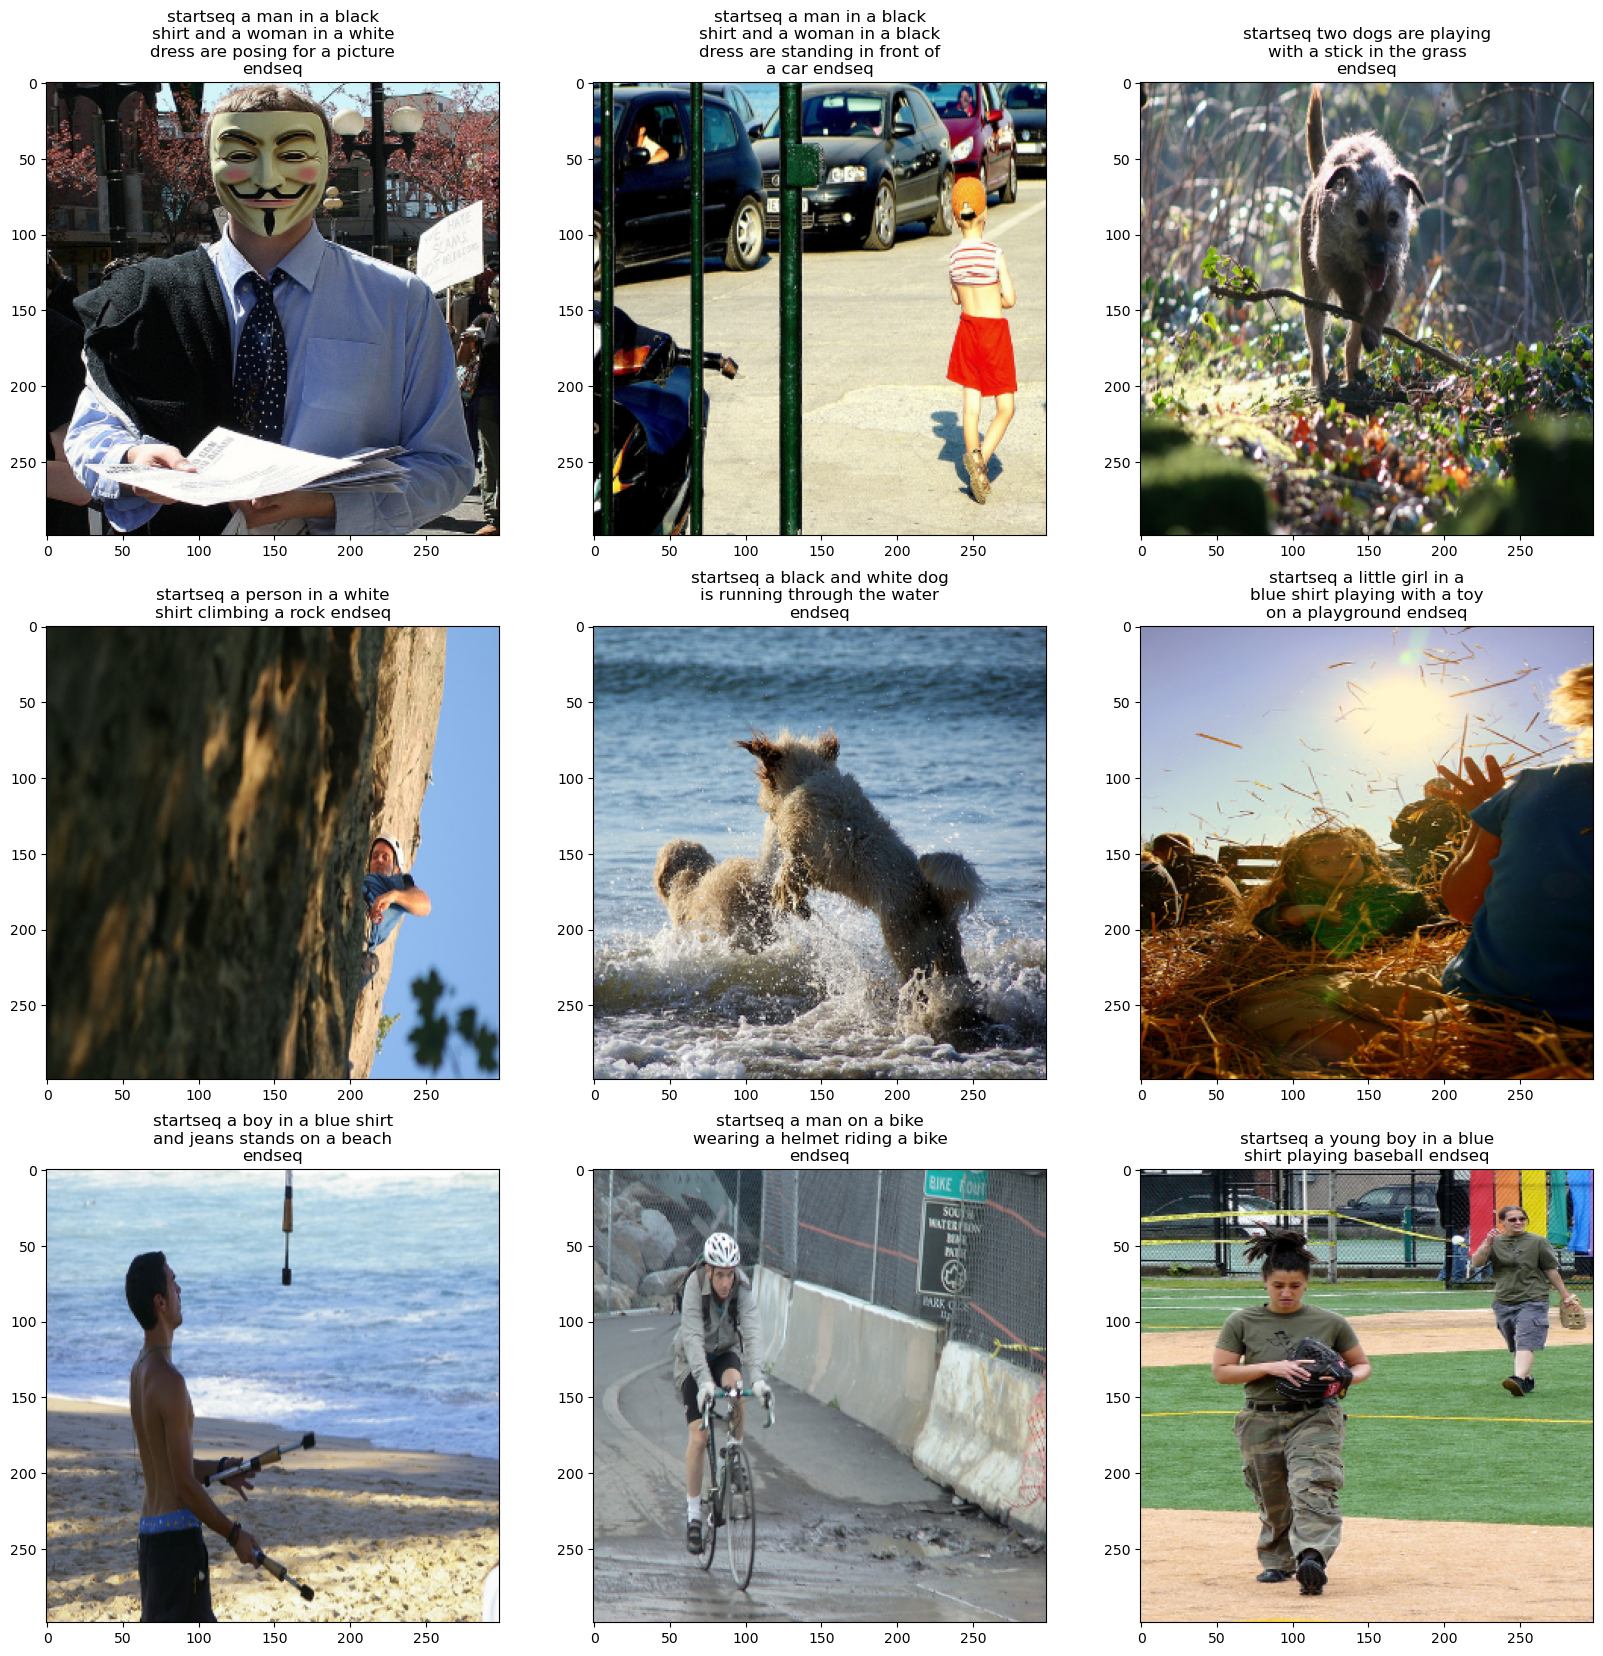

In [38]:
import random 
import textwrap
%matplotlib inline
pthing='./validation_data/flickr8k_validation_set_500_images/Images/'
random.shuffle(list_of_images_path)
ax,fig=plt.subplots(3,3,figsize=(20,20))
flatten=fig.flatten()
for i,k in enumerate(flatten):
    pred=beam_search(cnn,rnn,pthing+list_of_images_path[i],5)
    caption='\n'.join(textwrap.wrap(pred,width=30))
    read=plt.imread(pthing+list_of_images_path[i])
    resize=cv.resize(read,(299,299))
    k.imshow(resize)
    k.set_title(caption)
plt.show()
    

In [22]:
plt.imshow(plt.imread(images_test[0]))
plt.show()

In [18]:
captions_image[os.path.basename(images_test[0])]

['A man wears an orange hat and glasses .',
 'A man with glasses is wearing a beer can crocheted hat .',
 'A man with gauges and glasses is wearing a Blitz hat .',
 'The man with pierced ears is wearing glasses and an orange hat .',
 'A man in an orange hat starring at something .']